In [1]:
from data.openml import get_openml_data
from auto_encoder.sklearn import AutoTransformer, ConvolutionalAutoTransformer, Transformer, IdentityTransformer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [5]:
encoded_data = {}
reconstructed_data = {}
transformers = {t: Transformer(type=t) for t in ['ae', 'vae', 'dae', 'sae']}
transformers['original': IdentityTransformer()]
transformers['pca': PCA(n_components=274)]

for dataset_id in [40996, 40668, 44]:
    x, y = get_openml_data(dataset_id)
    for t_name, transformer in transformers.items():
        x_encoded = transformer.fit_transform(x)
        x_reconstructed = transformer.inverse_transform(x_encoded)
        encoded_data[(dataset_id, t_name)] = {'x': x_encoded, 'y': y}
        reconstructed_data[(dataset_id, t_name)] = {'x': x_reconstructed, 'y': y}
        
np.save('encodings.npy', encoded_data)
np.save('reconstructions.npy', reconstructed_data)
np.save('reconstruction_samples.npy', reconstruction_samples)

Epoch 1/100
1969/1969 [==============================] - 12s 5ms/step - loss: 0.3084 - val_loss: 0.2718
Epoch 2/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2705 - val_loss: 0.2662
Epoch 3/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2658 - val_loss: 0.2645
Epoch 4/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2641 - val_loss: 0.2626
Epoch 5/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2619 - val_loss: 0.2611
Epoch 6/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2616 - val_loss: 0.2606
Epoch 7/100
1969/1969 [==============================] - 9s 5ms/step - loss: 0.2608 - val_loss: 0.2598
Epoch 8/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2603 - val_loss: 0.2590
Epoch 9/100
1969/1969 [==============================] - 10s 5ms/step - loss: 0.2597 - val_loss: 0.2593
Epoch 10/100
1969/1969 [==============================] - 9s 5ms/

In [12]:
true_labels = {40996: 
               {0:'T-shirt / Top',
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
                8:'Bag',
                9:'Ankle boot'},
               40668:
               {2: 'Win', 
                1: 'Loss', 
                0: 'Draw'},
               44:
               {0: 'No Spam',
                1: 'Spam'}
              }

def plot_latent_space(dataset_id, x, y, t_name, n_samples=1000, figsize=(5, 5)):
    x_samples, y_samples = resample(x, y, n_samples=n_samples, stratify=y, replace=False)
    if x_samples.shape[1] > 2:
        tsne = TSNE()
        x_samples = tsne.fit_transform(x_samples)
    fig, ax = plt.subplots(figsize=figsize)
    for clss in np.unique(y_samples):
        x_clss = x_samples[y_samples == clss]
        ax.scatter(x_clss[:, 0], x_clss[:, 1], alpha=0.8, label=true_labels[dataset_id][clss])
        
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset_id}_{t_name}.svg', dpi=300)
    plt.close(fig)
    
def plot_reconstructions(data, t_name=None, figsize=(3, 3), save=True, title=False):
    figsize = (figsize[0] * len(data), figsize[1])
    fig, axs = plt.subplots(nrows=1, ncols=len(data), figsize=figsize)
    if title:
        axs[0].set_ylabel(t_name.upper(), fontsize=16)
    for (label, sample), ax in zip(data.items(), axs):
        sample.reshape((-1, 28, 28))
        ax.set_xlabel(label)
        ax.imshow(sample, cmap='gray')
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False) 
        
    plt.tight_layout()
    if save:
        plt.savefig(f'visualizations/reconstructions/{t_name}.svg')
        plt.close(fig)

In [2]:
reconstruction_samples = np.load('reconstruction_samples.npy', allow_pickle=True)[()]

In [12]:
for (dataset_id, t_name), data in encoded_data.items():
    x, y = data['x'], data['y']
    plot_latent_space(dataset_id, x, y, t_name)

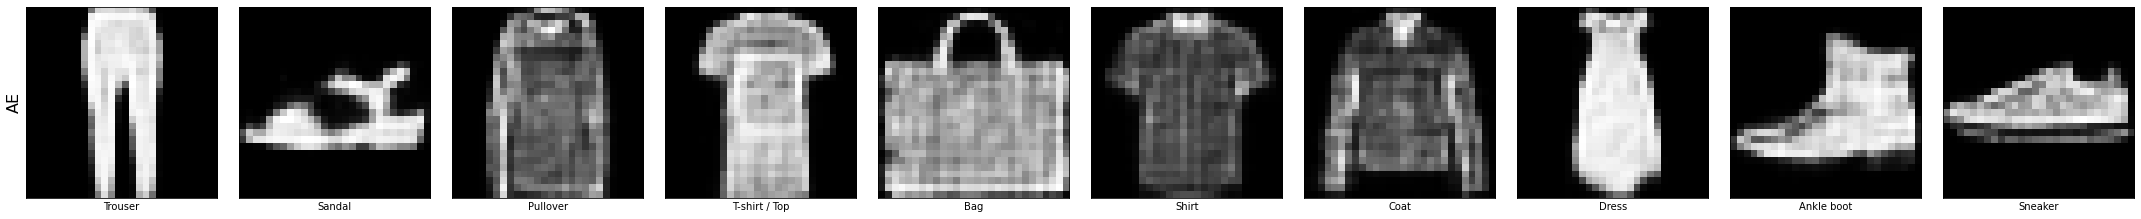

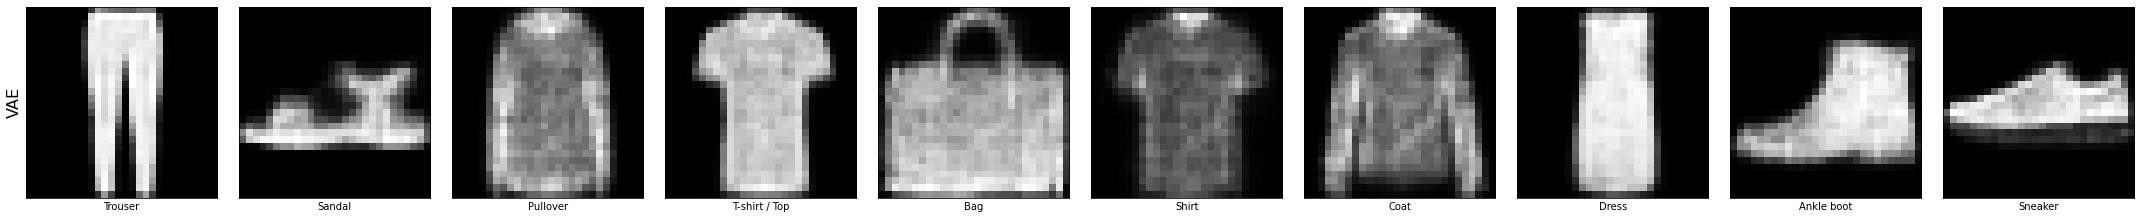

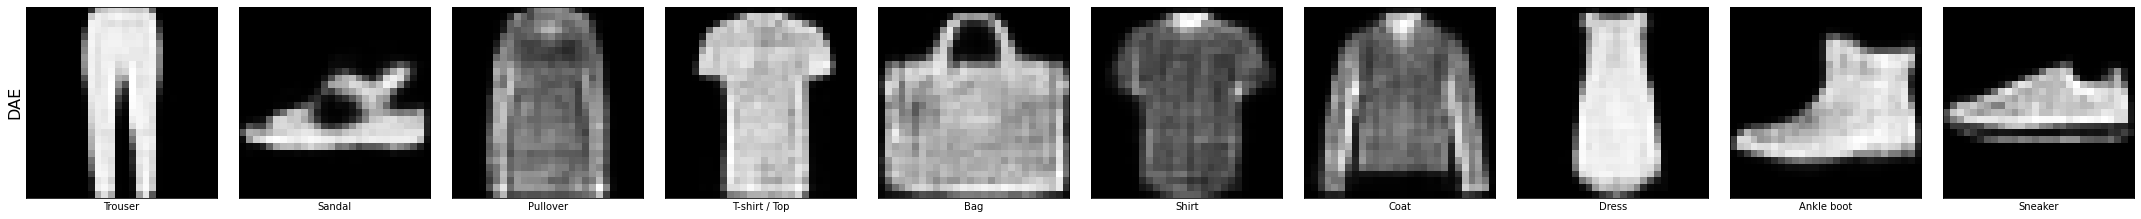

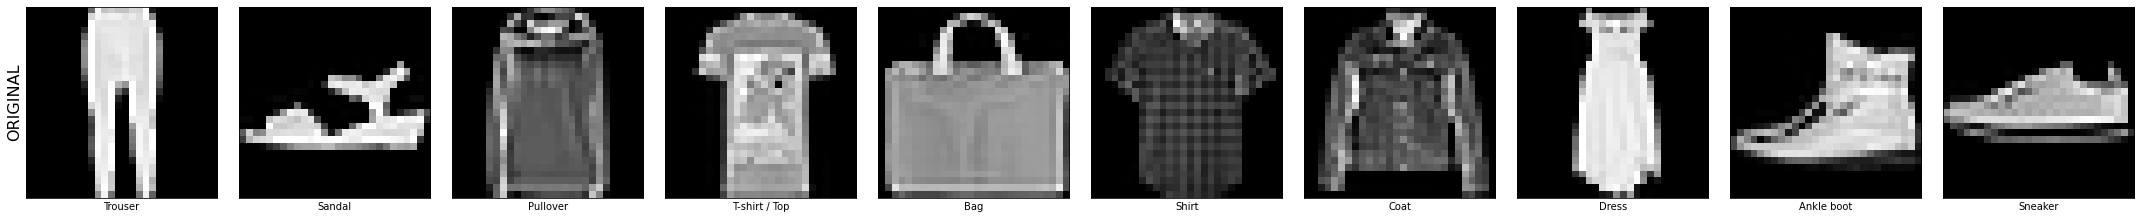

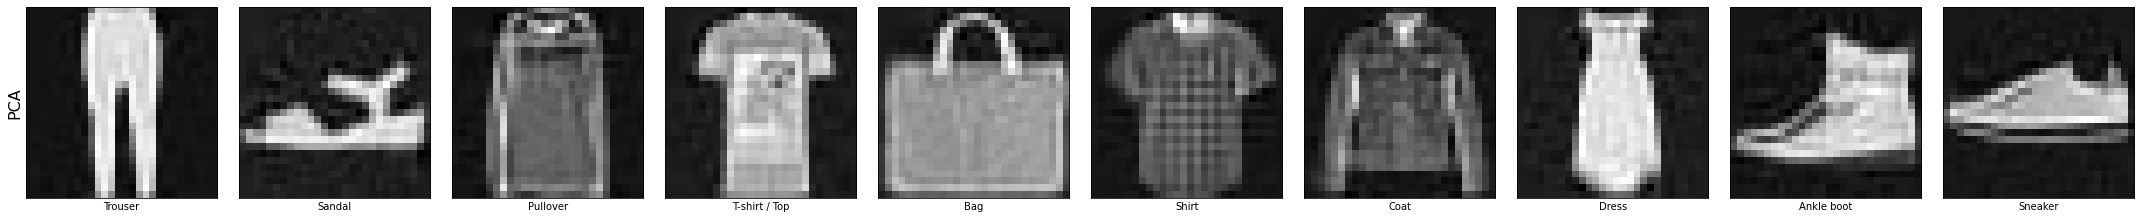

In [13]:
for t_type, data in reconstruction_samples.items():
    plot_reconstructions(data, t_name=t_type, save=False, title=True)
    
plt.savefig(f'visualizations/reconstructions/all.svg')